In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2 as cv

1.3

In [2]:
# Set the base directory for the Jute Pest Dataset and define image parameters
base_dir = "/kaggle/input/jute-pest/Jute_Pest_Dataset/Jute_Pest_Dataset"
batch_size = 32
img_height = 224
img_width = 224

# Define directories for training, validation, and test datasets
train_dir = f'{base_dir}/train'
val_dir = f'{base_dir}/val'
test_dir = f'{base_dir}/test'

# Load and preprocess the training dataset with specified image size and batch size
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Save the class names from the training dataset for reference
class_names = train_ds.class_names

# Load and preprocess the validation dataset with the same parameters
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load and preprocess the test dataset, using similar parameters
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [3]:
for images, labels in train_ds.take(1):  # Taking a single batch
    print(images.numpy().shape)  # Accessing the feature tensors (images)
    print(labels.numpy())  # Accessing the integer labels
    print([class_names[label] for label in labels.numpy()])  # Convert integer labels to class names

(32, 224, 224, 3)
[ 9  9  6  4 15  9  2  2 11  7  6 15  6 11 15  8  7  7 12 13 13  9 14  6
 10  8 13 16  0  7  2  5]
['Jute Stem Weevil', 'Jute Stem Weevil', 'Jute Red Mite', 'Jute Aphid', 'Termite odontotermes (Rambur)', 'Jute Stem Weevil', 'Cutworm', 'Cutworm', 'Mealybug', 'Jute Semilooper', 'Jute Red Mite', 'Termite odontotermes (Rambur)', 'Jute Red Mite', 'Mealybug', 'Termite odontotermes (Rambur)', 'Jute Stem Girdler', 'Jute Semilooper', 'Jute Semilooper', 'Pod Borer', 'Scopula Emissaria', 'Scopula Emissaria', 'Jute Stem Weevil', 'Termite', 'Jute Red Mite', 'Leaf Beetle', 'Jute Stem Girdler', 'Scopula Emissaria', 'Yellow Mite', 'Beet Armyworm', 'Jute Semilooper', 'Cutworm', 'Jute Hairy']


In [4]:
# Define data augmentation layer with random transformations to improve model generalization
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    keras.layers.RandomRotation(0.2),                    # Apply random rotation to images
    keras.layers.RandomZoom(0.2),                        # Zoom images randomly
    keras.layers.RandomContrast(0.1)                     # Adjust image contrast randomly
])

# Apply data augmentation to the training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


1.4

In [10]:

Model = keras.models.Sequential([
    
    # First convolutional layer with 32 filters and ReLU activation, followed by max pooling
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer with 64 filters and ReLU activation, followed by max pooling
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer with 128 filters and ReLU activation, followed by max pooling
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Dropout layer to reduce overfitting
    keras.layers.Dropout(0.5),
    
    # Flatten the output for the dense layers
    keras.layers.Flatten(),
    
    # Dense layer with 256 units, ReLU activation, and L2 regularization
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    
    # Dropout layer to further reduce overfitting
    keras.layers.Dropout(0.5),
    
    # Output layer with 17 units (for 17 classes), using softmax for multi-class classification
    keras.layers.Dense(17, activation='softmax')
])   


In [11]:
model = Model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 17)             │         4,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,249,041 (84.87 MB)

 Trainable params: 22,249,041 (84.87 MB)

 Non-trainable params: 0 (0.00 B)

1.7

In [12]:
# Compile the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model on the training dataset and validate using the validation dataset over 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 108s 497ms/step - accuracy: 0.0891 - loss: 31.8297 - val_accuracy: 0.1937 - val_loss: 3.5822
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 90s 447ms/step - accuracy: 0.1185 - loss: 3.5836 - val_accuracy: 0.1840 - val_loss: 3.5145
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 90s 444ms/step - accuracy: 0.1131 - loss: 3.5138 - val_accuracy: 0.1840 - val_loss: 3.4647
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 433ms/step - accuracy: 0.1136 - loss: 3.4476 - val_accuracy: 0.1889 - val_loss: 3.3942
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 90s 445ms/step - accuracy: 0.1163 - loss: 3.3945 - val_accuracy: 0.1840 - val_loss: 3.3277
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 90s 445ms/step - accuracy: 0.1211 - loss: 3.3081 - val_accuracy: 0.1913 - val_loss: 3.2851
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 90s 444ms/step - accuracy: 0.1175 - loss: 3.2841 - val_accuracy: 0.1913 - val_loss: 3.2710
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 90s 444ms/step - accuracy: 0.1168 - loss:

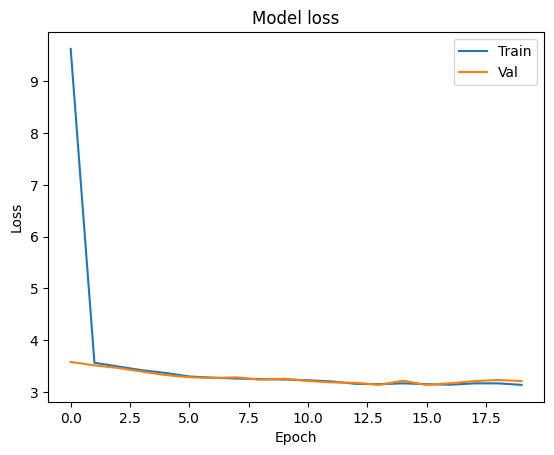

In [13]:
# plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

1.10

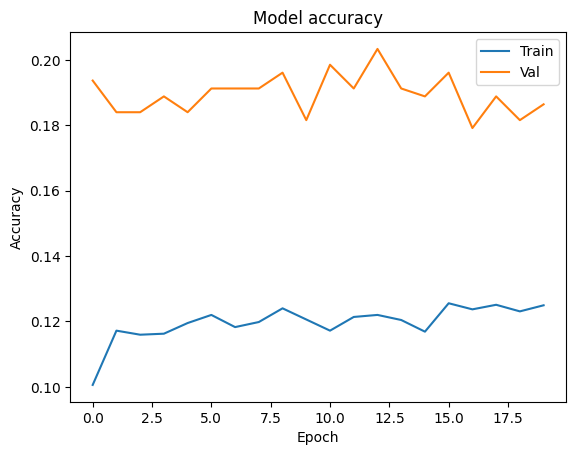

In [14]:
#plot the model accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Extract true labels
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())

# Convert list of true labels to a NumPy array
true_labels = np.array(true_labels)

# Get predictions
predictions = np.argmax(model.predict(test_ds), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(cm)

# Optionally, print the classification report for more metrics
print("\nClassification Report:")
print(classification_report(true_labels, predictions))

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step
Confusion Matrix:
[[ 0  0  0  0  1  0  0  1  0 15  0  2  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 13  0  4  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 18  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 19  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  1  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 22  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 21  0  1  0  0  0  1  0]
 [ 0  0  0  0  2  1  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  1  0 17  1  3  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0 21  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 17  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 22  0  1  0  0  0  1  0]]

Classification Report

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1.11

In [16]:
# Define multiple Adam optimizers with different learning rates for experimentation
optimizer1 = keras.optimizers.Adam(learning_rate=0.0001)
optimizer2 = keras.optimizers.Adam(learning_rate=0.001)
optimizer3 = keras.optimizers.Adam(learning_rate=0.01)
optimizer4 = keras.optimizers.Adam(learning_rate=0.1)


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 96s 452ms/step - accuracy: 0.1205 - loss: 2.9885 - val_accuracy: 0.1840 - val_loss: 2.8832
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 89s 442ms/step - accuracy: 0.1564 - loss: 2.7354 - val_accuracy: 0.2591 - val_loss: 2.6917
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 90s 445ms/step - accuracy: 0.1964 - loss: 2.5800 - val_accuracy: 0.2639 - val_loss: 2.6528
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 437ms/step - accuracy: 0.2360 - loss: 2.4850 - val_accuracy: 0.2688 - val_loss: 2.5839
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 87s 427ms/step - accuracy: 0.2443 - loss: 2.4228 - val_accuracy: 0.2663 - val_loss: 2.4520
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 89s 441ms/step - accuracy: 0.2664 - loss: 2.3550 - val_accuracy: 0.2906 - val_loss: 2.5380
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 435ms/step - accuracy: 0.2872 - loss: 2.3038 - val_accuracy: 0.3075 - val_loss: 2.4051
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 89s 439ms/step - accuracy: 0.3195 - loss: 2

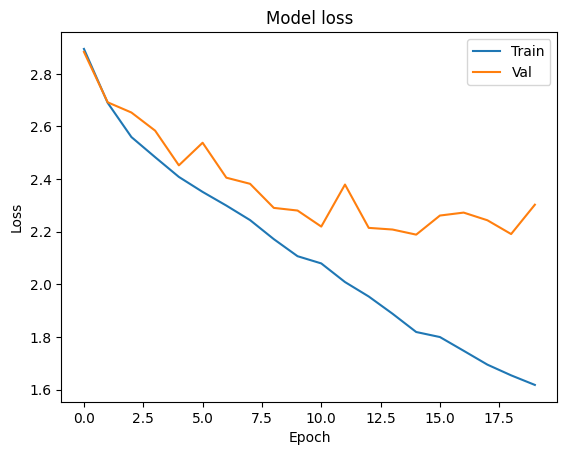

In [17]:
# Compile the model using optimizer1, with sparse categorical cross-entropy as the loss function and accuracy as a metric
model.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training dataset and validate on the validation dataset, setting the number of epochs to 20
history1 = model.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the model's training and validation loss to observe learning progress over epochs
plt.plot(history1.history['loss'])        
plt.plot(history1.history['val_loss'])    
plt.title('Model loss')                   
plt.ylabel('Loss')                        
plt.xlabel('Epoch')                      
plt.legend(['Train', 'Val'], loc='upper right')  
plt.show()                                


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 97s 456ms/step - accuracy: 0.1779 - loss: 3.0438 - val_accuracy: 0.1211 - val_loss: 3.1627
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 87s 429ms/step - accuracy: 0.1084 - loss: 3.1267 - val_accuracy: 0.1695 - val_loss: 3.2684
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 434ms/step - accuracy: 0.1296 - loss: 3.1735 - val_accuracy: 0.1743 - val_loss: 3.2941
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 89s 440ms/step - accuracy: 0.1279 - loss: 3.1983 - val_accuracy: 0.1816 - val_loss: 3.2858
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 89s 439ms/step - accuracy: 0.1244 - loss: 3.2578 - val_accuracy: 0.1743 - val_loss: 3.3240
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 433ms/step - accuracy: 0.1175 - loss: 3.2743 - val_accuracy: 0.1889 - val_loss: 3.2367
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 89s 438ms/step - accuracy: 0.1184 - loss: 3.2049 - val_accuracy: 0.1816 - val_loss: 3.1708
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 87s 431ms/step - accuracy: 0.1195 - loss: 3

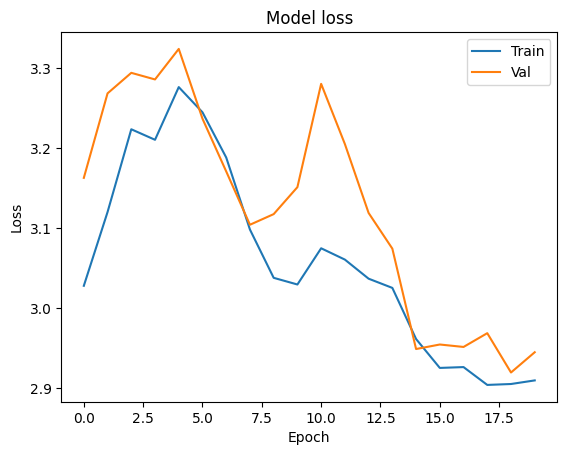

In [18]:
# Compile the model using the second optimizer (optimizer2) with sparse categorical cross-entropy loss and accuracy metric
model.compile(optimizer=optimizer2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training dataset and validate on the validation dataset over 20 epochs
history2 = model.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot training and validation loss for visual comparison across epochs
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 98s 462ms/step - accuracy: 0.1021 - loss: 6.6069 - val_accuracy: 0.1743 - val_loss: 3.6906
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 87s 431ms/step - accuracy: 0.1058 - loss: 3.6014 - val_accuracy: 0.1719 - val_loss: 3.3994
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 86s 425ms/step - accuracy: 0.1045 - loss: 3.3527 - val_accuracy: 0.1719 - val_loss: 3.2570
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 436ms/step - accuracy: 0.1045 - loss: 3.2318 - val_accuracy: 0.1719 - val_loss: 3.1712
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 87s 428ms/step - accuracy: 0.1030 - loss: 3.1457 - val_accuracy: 0.1719 - val_loss: 3.1055
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 435ms/step - accuracy: 0.1043 - loss: 3.0821 - val_accuracy: 0.1719 - val_loss: 3.0512
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 86s 427ms/step - accuracy: 0.1044 - loss: 3.0310 - val_accuracy: 0.1719 - val_loss: 3.0079
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 433ms/step - accuracy: 0.1033 - loss: 2

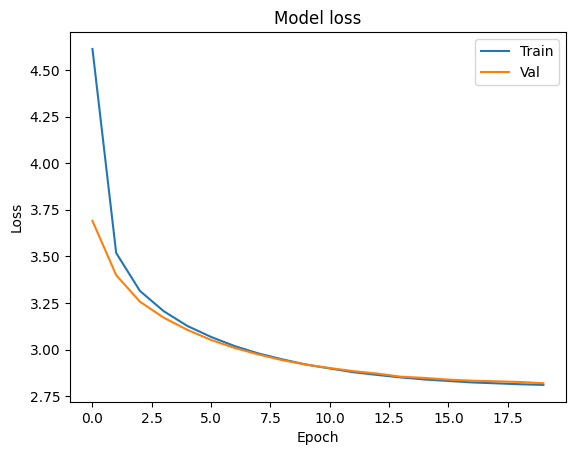

In [19]:
# Compile the model using the third optimizer (optimizer3), maintaining the same loss function and metrics
model.compile(optimizer=optimizer3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training dataset while validating against the validation dataset for 20 epochs
history3 = model.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the loss curves for both training and validation to assess the model's performance over epochs
plt.plot(history3.history['loss'])        
plt.plot(history3.history['val_loss'])   
plt.title('Model loss')                   
plt.ylabel('Loss')                        
plt.xlabel('Epoch')                       
plt.legend(['Train', 'Val'], loc='upper right') 
plt.show()                                


Epoch 1/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 99s 467ms/step - accuracy: 0.0835 - loss: 103.5962 - val_accuracy: 0.1719 - val_loss: 13.4417
Epoch 2/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 89s 441ms/step - accuracy: 0.1025 - loss: 9.6360 - val_accuracy: 0.1719 - val_loss: 4.4373
Epoch 3/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 90s 447ms/step - accuracy: 0.0911 - loss: 3.9770 - val_accuracy: 0.1719 - val_loss: 3.3828
Epoch 4/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 90s 446ms/step - accuracy: 0.0995 - loss: 3.2916 - val_accuracy: 0.1719 - val_loss: 3.2222
Epoch 5/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 436ms/step - accuracy: 0.1047 - loss: 3.1000 - val_accuracy: 0.1719 - val_loss: 2.9802
Epoch 6/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 89s 438ms/step - accuracy: 0.1023 - loss: 3.0259 - val_accuracy: 0.1719 - val_loss: 3.3941
Epoch 7/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 89s 441ms/step - accuracy: 0.0913 - loss: 3.0672 - val_accuracy: 0.1719 - val_loss: 3.0272
Epoch 8/20
202/202 ━━━━━━━━━━━━━━━━━━━━ 88s 436ms/step - accuracy: 0.0964 - loss

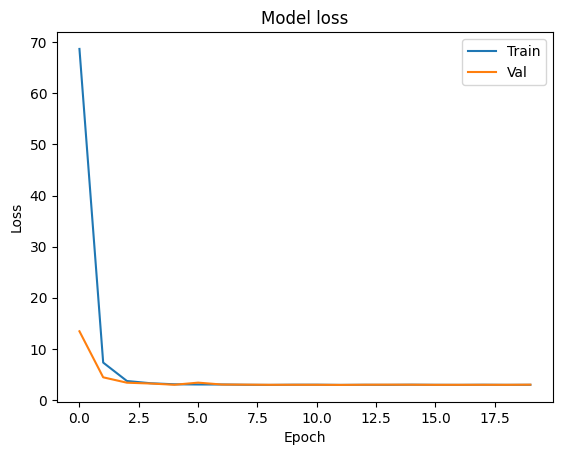

In [20]:
# Compile the model using the fourth optimizer (optimizer4), keeping the loss function and metrics consistent
model.compile(optimizer=optimizer4, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training dataset with validation on the validation dataset for a duration of 20 epochs
history4 = model.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the training and validation loss to evaluate the model's performance and potential overfitting over the epochs
plt.plot(history4.history['loss'])       
plt.plot(history4.history['val_loss'])    
plt.title('Model loss')                  
plt.ylabel('Loss')                        
plt.xlabel('Epoch')                       
plt.legend(['Train', 'Val'], loc='upper right')  
plt.show()                                

**The best model has 0.0001 learning rate and 57.89% training accuracy and 53.75% validation accuracy**

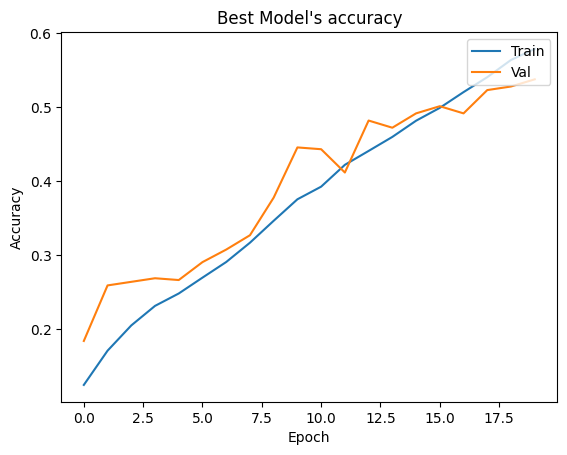

In [21]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Best Model's accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()